# Ultimate Technologies Data Science Challenge

Ultimate Technologies Inc. is an American worldwide online transportation network company that has disrupted the taxi and logistics industry. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

## Part 3. Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014 is provided. We consider a user retained if they were “active” (i.e., took a trip) in their 6th month.  
  
We use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.  
  
**3.1. Data Cleaning and Exploratory Data Analysis**  
Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?  
  
**3.2. Modeling**  
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.  
  
**3.3. Suggestions**  
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).
  
  
**< Data description >**  
- **city:** city this user signed up in  
- **phone:** primary device for this user  
- **signup_date:** date of account registration; in the form ‘YYYYMMDD’  
- **last_trip_date:** the last time this user completed a trip; in the form ‘YYYYMMDD’  
- **avg_dist:** the average distance in miles per trip taken in the first 30 days after signup  
- **avg_rating_by_driver:** the rider’s average rating over all of their trips  
- **avg_rating_of_driver:** the rider’s average rating of their drivers over all of their trips  
- **surge_pct:** the percent of trips taken with surge multiplier > 1  
- **avg_surge:** The average surge multiplier over all of this user’s trips  
- **trips_in_first_30_days:** the number of trips this user took in the first 30 days after signing up  
- **ultimate_black_user:** TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise  
- **weekday_pct:** the percent of the user’s trips occurring during a weekday  

### 3.1. Data cleaning and Exploratory Data Analysis

In [1]:
# Import the packages
%matplotlib notebook

# EDA or data preparation
import json
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, cv, plot_importance

# Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Set a style for a plot
sns.set(context='notebook', style='ticks', palette='hls')

Load data and check the general information and sumary statistics of each column.

In [2]:
# Load "ultimate_data_challenge.json"
with open('ultimate_data_challenge.json') as json_file2:
    json_data2 = json.load(json_file2)

# Transform the json into DataFrame
df_data = pd.DataFrame(json_data2)

print('Raw data:')
df_data.head()

Raw data:


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [3]:
# Check the general information
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
# Get summary statistics of each column
df_data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


There were 50k datapoints (users) and 12 features. Two columns ("avg_rating_of_driver" and "avg_rating_by_driver") were about rating (1 - 5). Five columns had numbers in addition to the rating columns. **Some columns had a broad range of numbers and some were narrow**. The **"city", "phone", and "ultimate_black_user" columns were categorical**. There were two columns ("signup_date" and "last_trip_date") about date.  
  
Three columns had missing values. The number of missing values of the "phone" and "avg_rating_by_driver" columns were less than 1%, and I decided to remove them. The "avg_rating_of_driver" column also had missing values (16%). I will think about it later.

In [5]:
# Drop the rows having missing values in the "phone" and "avg_rating_by_driver" 
df_data.dropna(subset=['phone', 'avg_rating_by_driver'], inplace=True)

# Check the general information again
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49406 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49406 non-null  object 
 1   trips_in_first_30_days  49406 non-null  int64  
 2   signup_date             49406 non-null  object 
 3   avg_rating_of_driver    41445 non-null  float64
 4   avg_surge               49406 non-null  float64
 5   last_trip_date          49406 non-null  object 
 6   phone                   49406 non-null  object 
 7   surge_pct               49406 non-null  float64
 8   ultimate_black_user     49406 non-null  bool   
 9   weekday_pct             49406 non-null  float64
 10  avg_dist                49406 non-null  float64
 11  avg_rating_by_driver    49406 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


First, change the values in "last_trip_date" into a datetime object to identify who were active after their 6th month (i.e., after Jun 1st). Then, make a new column "status" that stores the user statuses (0: inactive, 1: active).  

In [6]:
# Convert the values of the "signup_date" and "last_trip_date" into a datetime object 
df_data['signup_date'] = pd.to_datetime(df_data['signup_date'])
df_data['last_trip_date'] = pd.to_datetime(df_data['last_trip_date'])  

# Make a new column "status" storing the user statuses (0: inactive, 1: active)
df_data['status'] = (df_data['last_trip_date'] >= '2014-06-01')*1
        
# Separate the data into 'active' and 'inactive'
df_active = df_data.query('status == 1')
df_inactive = df_data.query('status == 0')

# Print the active rate of users
print('Active user rate:', round(len(df_active)/len(df_data)*100, 1), '%')

Active user rate: 37.7 %


37.7% of the users was active in their 6th month. It is not perfectly balanced, but the active rate would be high enough to use general algorithms to build a model.  
  
Explore which features would have a big impact on the account status and the relationships between features. To do so, plot a matrix of scatter plots of df_data. These plots are only for numeric columns. Plot the categorical columns as bar plots, too.

<IPython.core.display.Javascript object>


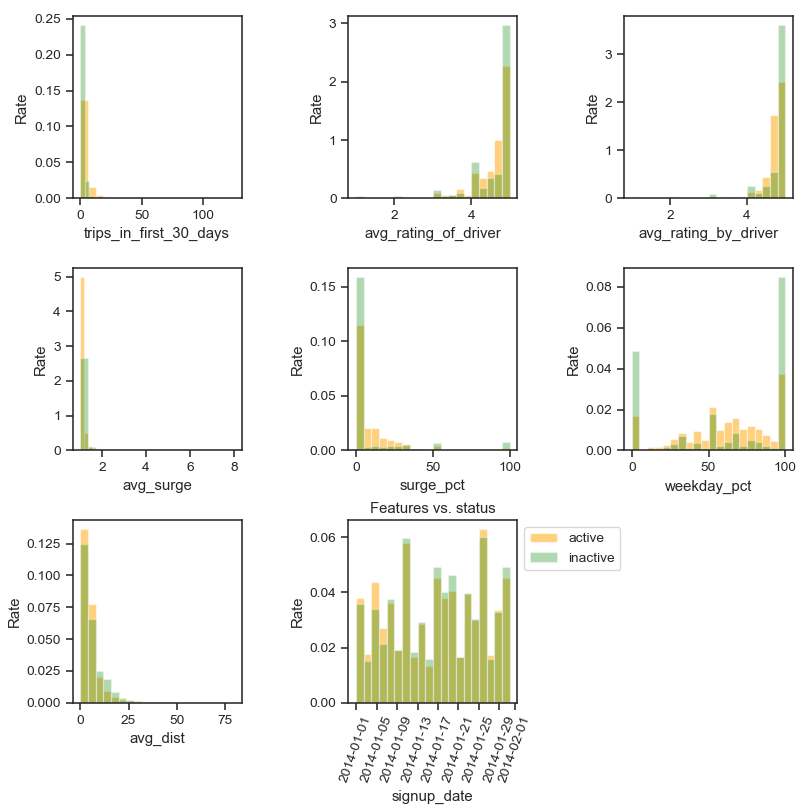

In [7]:
# Numeric columns
columns_forPlot = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_rating_by_driver', 
                   'avg_surge', 'surge_pct', 'weekday_pct',
                   'avg_dist', 'signup_date']

# Plot histograms
plt.figure(figsize=(10,10))

for n in range(8):
    plt.subplot(3,3,n+1)
    plt.hist(df_active[columns_forPlot[n]], histtype='bar', bins=20, alpha=0.5, color='orange', 
             label='active', density=True) 
    plt.hist(df_inactive[columns_forPlot[n]], histtype='bar', bins=20, alpha=0.3, color='green', 
             label='inactive', density=True)
    plt.xlabel('%s'%columns_forPlot[n])
    plt.ylabel('Rate')

plt.xticks(rotation=70) 
plt.legend(['active', 'inactive'], loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Features vs. status')
plt.subplots_adjust(left=0.1, right=0.99, bottom=0.1, top=0.9) 
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


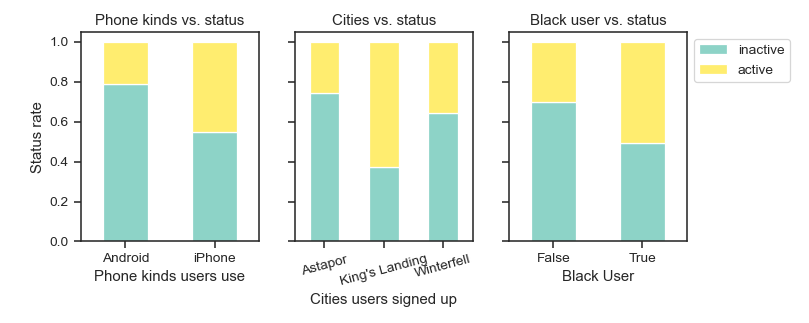

In [8]:
# Prepare for the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,4), sharey=True)

# "Phone" column
# plot a stacked bar plot 
df_cross_phone1 = pd.crosstab(df_data['phone'], df_data['status'], normalize='index')
ax3 = df_cross_phone1.plot.bar(stacked=True, colormap='Set3', title='Phone kinds vs. status', rot=0, ax=axes[0], legend=False)
ax3.set_xlabel('Phone kinds users use')
ax3.set_ylabel('Status rate')

# "city" column
# plot a stacked bar plot 
df_cross_city = pd.crosstab(df_data['city'], df_data['status'], normalize='index')
ax4 = df_cross_city.plot.bar(stacked=True, colormap='Set3', title='Cities vs. status', rot=15, ax=axes[1], legend=False)
ax4.set_xlabel('Cities users signed up')

# "ultimate_black_user" column
# plot a stacked bar 
df_cross_blackUser = pd.crosstab(df_data['ultimate_black_user'], df_data['status'], normalize='index')
ax5 = df_cross_blackUser.plot.bar(stacked=True, colormap='Set3', title='Black user vs. status', rot=0, ax=axes[2])
ax5.set_xlabel('Black User')
ax5.legend(['inactive', 'active'], loc='upper left', bbox_to_anchor=(1, 1)) #loc='upper right', 

plt.subplots_adjust(left=0.1, right=0.85, bottom=0.25, top=0.9) 

In [9]:
# Transfer the categorical features into numeric features
df_numeric = pd.get_dummies(df_data, columns=['city', 'phone', 'ultimate_black_user'])

# Get the correlations
corr = df_numeric.corr()
corr['status'].sort_values(ascending=False)

status                       1.000000
city_King's Landing          0.261551
phone_iPhone                 0.227551
trips_in_first_30_days       0.210294
ultimate_black_user_True     0.206077
surge_pct                    0.011697
weekday_pct                  0.009519
avg_surge                   -0.003434
avg_rating_of_driver        -0.011829
avg_rating_by_driver        -0.026371
city_Winterfell             -0.045642
avg_dist                    -0.093581
city_Astapor                -0.175157
ultimate_black_user_False   -0.206077
phone_Android               -0.227551
Name: status, dtype: float64

<IPython.core.display.Javascript object>


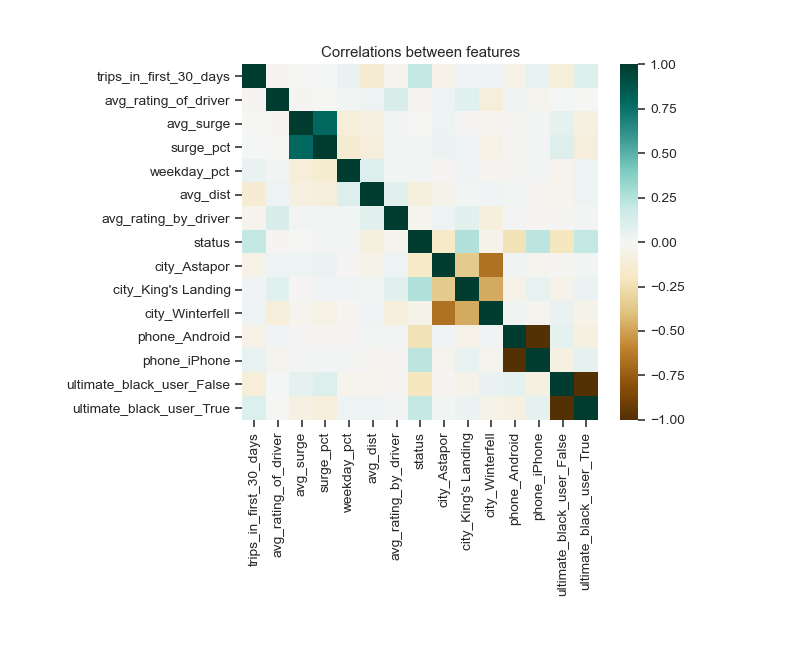

In [10]:
# Plot the relationships between features
plt.figure(figsize=(10,8))

sns.heatmap(corr, cmap='BrBG')

plt.subplots_adjust(left=0.3, right=0.85, bottom=0.35, top=0.9)

plt.title('Correlations between features')
plt.show()

According to the plots and correlations, four columns (**"city", "phone", "trips_in_first_30_days", and "ultimate_black_user") would have the biggest impact** for the prediction. On the other hand, the "signup_date" column seemed to have a very limited impact on the status, and I decided to remove the column to build a predictive model. The "last_trip_date" column was used to make the "status" column, and it would be highly connected. I will use the rest of the columns to build the model.
    
These factors could be the key features of active users:  
  
- **do not often trip in the surge time** ("avg_surge": lower, "surge_pct": lower),  
- **trip weekdays** more than weekends ("weekday_pct": higher),  
- **iPhone holders**,  
- signed up in **King's Landing**, 
- ultimate **black user**,  
- tripped many times in the **first 30 days**, and  
- trip **shorter distance** ("avg_dist": lower)  
  
According to the correlation plot, there is a **positive correlation between "surge_pct" and "avg_surge"**.    

In [11]:
# Drop the columns that are not used for making the model
df_numeric.drop(['signup_date', 'last_trip_date', 'ultimate_black_user_False', 'phone_Android', 'city_Winterfell'], 
                axis=1, inplace=True)

# Check the general information again
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49406 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   trips_in_first_30_days    49406 non-null  int64  
 1   avg_rating_of_driver      41445 non-null  float64
 2   avg_surge                 49406 non-null  float64
 3   surge_pct                 49406 non-null  float64
 4   weekday_pct               49406 non-null  float64
 5   avg_dist                  49406 non-null  float64
 6   avg_rating_by_driver      49406 non-null  float64
 7   status                    49406 non-null  int32  
 8   city_Astapor              49406 non-null  uint8  
 9   city_King's Landing       49406 non-null  uint8  
 10  phone_iPhone              49406 non-null  uint8  
 11  ultimate_black_user_True  49406 non-null  uint8  
dtypes: float64(6), int32(1), int64(1), uint8(4)
memory usage: 3.4 MB


The "avg_rating_of_driver" column had missing values (16%). **Fill them out with the median** (use the median instead of the mean to reduce the effect of outliers). 

In [12]:
# Fill out the missing values
df_numeric.fillna({'avg_rating_of_driver': df_numeric['avg_rating_of_driver'].median()}, inplace=True)

Divide the data into a **train set and a test set**. Then, **standardize features** because some columns have a broader range or higher values than others. 

In [13]:
# Separate the data into target values and features
df_target = df_numeric['status']
df_features = df_numeric.drop('status', axis=1)

# Divide the data into a train set and a test set
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.3, random_state=1)

# Standardize features of the train set and the test set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### 3.2. Modeling

The goal is to build an effective model that predicts whether a user will be active in their 6th month. The labels are already in the data, and the prediction result is "inactive" or "active" (binary classification). That is, this problem is solved by **classification** that is one of the supervised learning methods.  
  
There are many kinds of classifiers that can be used for this problem. For example, logistic regression, linear SVC, kernel SVC, random forest, k-NN, neural network, etc. It is difficult to say which classifier is the best for this problem without trying, but each classifier has each feature. This table shows the **pros and cons** in this case:  
  
|Classifier|pros|cons|
|:-------:|:----:|:-----:|
|Naive Bayes|Fast, simple to use, easy update|Indipendent assumption, not best for continuous numbers, can’t learn interactions between features|  
|Linear SVC|outlier tolerance, overfitting tolerance|Takes time to turn the parameters, linear boundary|  
|Kernel SVC|Non-linear boundary, outlier tolerance, overfitting tolerance|Takes time to turn the parameters|  
|Logistic Regression|Fast, easy update|Linear boundary|  
|K-NN|Outlier effect is adjustable|Takes time, linear boundary|  
|Random Forest|Non-linear boundary, non-parametric|Takes time| 
|GBDT|Non-linear boundary, non-parametric|Takes time|  
  
Try these classifiers and compare the performances. The "active" users were about **38%**. It is not perfectly balanced, but it would be ok to use "**accuracy**" to compare the performances. In addition to accuracy, precision, recall, and f1 score will be monitored. 

In [14]:
# Make a DataFrame to store all of the performances of the classifiers
df_summary = pd.DataFrame(index=['Naive Bayes', 'Linear SVC', 'Kernel SVC', 'Logistic Regression', 'K-NN', 
                                 'Random Forest', 'GBDT'],
                          columns=['accuracy', 'precision', 'recall', 'f1_score'])

In [15]:
# Define a function turning parameters, training a model with a train set, and test the performance of the model 
def turning_train_predict(model_name, clf, X_train, y_train, X_test, y_test, gs=None, param_grid=None):
    # If gs (grid search) is off 
    if gs == None:
        clf.fit(X_train, y_train)
        accuracy_train = clf.score(X_train, y_train)
        print('Accuracy on the train set:', round(accuracy_train, 3))
        best_model = clf
        
    # Find the best parameters
    else:
        gs_cv = GridSearchCV(clf, param_grid, cv=5, n_jobs=2)
        gs_cv.fit(X_train, y_train)
        print('Best parameters:', gs_cv.best_params_)
        print('Best accuracy on the train set:', round(gs_cv.best_score_, 3))
        best_model = gs_cv
        
    # Predict the classes on the test data
    y_pred = best_model.predict(X_test)
    # Make a DataFrame of a confusion matrix
    df = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['inactive', 'active'], columns=['inactive', 'active'])
    df.index.name = 'Actual'
    df.columns.name = 'Predicted'
    print('--------------------------------------------------------')
    print(df)
    print('--------------------------------------------------------')
    
    # Print a classification report
    print(classification_report(y_test, y_pred, target_names=['inactive', 'active']))
    
    # Store the scores in the summary DataFrame
    df_summary.loc[model_name, 'accuracy'] = accuracy_score(y_test, y_pred)
    df_summary.loc[model_name, 'precision'] = precision_score(y_test, y_pred)
    df_summary.loc[model_name, 'recall'] = recall_score(y_test, y_pred)
    df_summary.loc[model_name, 'f1_score'] = f1_score(y_test, y_pred)

#### Naive Bayes

In [16]:
%%time

# Create a GaussianNB object
nb = GaussianNB()

# Train the classifier and check the performnce 
turning_train_predict('Naive Bayes', nb, X_train_scaled, y_train, X_test_scaled, y_test)

Accuracy on the train set: 0.721
--------------------------------------------------------
Predicted  inactive  active
Actual                     
inactive       6899    2332
active         1797    3794
--------------------------------------------------------
              precision    recall  f1-score   support

    inactive       0.79      0.75      0.77      9231
      active       0.62      0.68      0.65      5591

    accuracy                           0.72     14822
   macro avg       0.71      0.71      0.71     14822
weighted avg       0.73      0.72      0.72     14822

Wall time: 73.8 ms


#### Linear SVC

In [17]:
%%time

# Parameters to tune
param_grid = {'C':[1, 10, 100], 'gamma':[0.01, 0.1, 1]} 

line_svc = SVC(kernel='linear', class_weight='balanced', random_state=1)
turning_train_predict('Linear SVC', line_svc, X_train_scaled, y_train, X_test_scaled, y_test,
                      gs=True, param_grid=param_grid)

Best parameters: {'C': 10, 'gamma': 0.01}
Best accuracy on the train set: 0.704
--------------------------------------------------------
Predicted  inactive  active
Actual                     
inactive       6796    2435
active         1930    3661
--------------------------------------------------------
              precision    recall  f1-score   support

    inactive       0.78      0.74      0.76      9231
      active       0.60      0.65      0.63      5591

    accuracy                           0.71     14822
   macro avg       0.69      0.70      0.69     14822
weighted avg       0.71      0.71      0.71     14822

Wall time: 1h 34min 42s


#### Kernel SVC 

In [18]:
%%time

# Parameters to tune
param_grid = {'C':[1, 10, 50], 'gamma':[0.1, 1, 'scale']}

ker_svc = SVC(kernel='rbf', random_state=1, class_weight='balanced')
turning_train_predict('Kernel SVC', ker_svc, 
                      X_train_scaled, y_train, X_test_scaled, y_test, gs=True, param_grid=param_grid)

Best parameters: {'C': 1, 'gamma': 'scale'}
Best accuracy on the train set: 0.754
--------------------------------------------------------
Predicted  inactive  active
Actual                     
inactive       7032    2199
active         1411    4180
--------------------------------------------------------
              precision    recall  f1-score   support

    inactive       0.83      0.76      0.80      9231
      active       0.66      0.75      0.70      5591

    accuracy                           0.76     14822
   macro avg       0.74      0.75      0.75     14822
weighted avg       0.77      0.76      0.76     14822

Wall time: 32min 1s


#### Logistic Regression

In [19]:
%%time

# Parameters to tune
param_grid = {'C':np.logspace(-5, 8, 15), 
              'solver': ['liblinear', 'saga'], 
              'penalty': ['l1', 'l2']}

lr = LogisticRegression(random_state=1, class_weight='balanced')
turning_train_predict('Logistic Regression', lr, 
                      X_train_scaled, y_train, X_test_scaled, y_test, gs=True, param_grid=param_grid)

Best parameters: {'C': 8.483428982440725e-05, 'penalty': 'l2', 'solver': 'saga'}
Best accuracy on the train set: 0.705
--------------------------------------------------------
Predicted  inactive  active
Actual                     
inactive       6802    2429
active         1940    3651
--------------------------------------------------------
              precision    recall  f1-score   support

    inactive       0.78      0.74      0.76      9231
      active       0.60      0.65      0.63      5591

    accuracy                           0.71     14822
   macro avg       0.69      0.69      0.69     14822
weighted avg       0.71      0.71      0.71     14822

Wall time: 17.3 s


#### K-NN

In [20]:
%%time

# ks
neighbors = np.arange(2, 40)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train_scaled, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_scaled, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test_scaled, y_test)

Wall time: 6min 16s


<IPython.core.display.Javascript object>


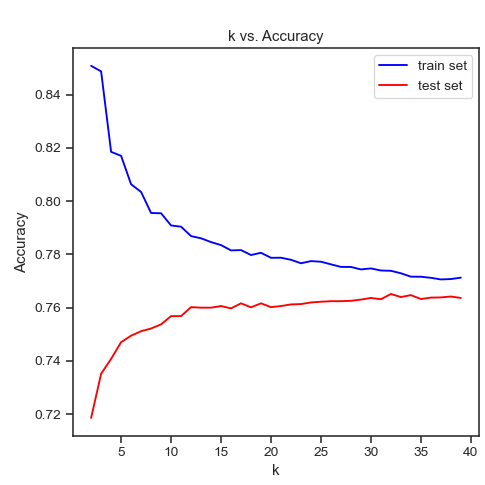

In [21]:
# Plot line plots
plt.figure(figsize=(6,6))

plt.plot(neighbors, train_accuracy, color='b', label='train set')
plt.plot(neighbors, test_accuracy, color='r', label='test set')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

plt.title('k vs. Accuracy')
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.1, top=0.9) 
plt.show()

In [22]:
%%time

# Show k having the maximum accuracy on the test set 
best_k = np.argmax(test_accuracy)+2
print('Best k:', best_k)

# Train the model with the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
turning_train_predict('K-NN', knn_best, X_train_scaled, y_train, X_test_scaled, y_test)

Best k: 32
Accuracy on the train set: 0.774
--------------------------------------------------------
Predicted  inactive  active
Actual                     
inactive       7822    1409
active         2072    3519
--------------------------------------------------------
              precision    recall  f1-score   support

    inactive       0.79      0.85      0.82      9231
      active       0.71      0.63      0.67      5591

    accuracy                           0.77     14822
   macro avg       0.75      0.74      0.74     14822
weighted avg       0.76      0.77      0.76     14822

Wall time: 10.2 s


#### Random Forest

In [23]:
%%time

param_grid = {'n_estimators':[30, 50, 100], 
              'max_depth':[5, 10, 20], 
              'min_samples_leaf': [2, 5, 10],
              'min_samples_split': [5, 10, 20],
              'criterion':['entropy', 'gini']} 

rf = RandomForestClassifier(class_weight='balanced', n_jobs=2, random_state=1)
turning_train_predict('Random Forest', rf, X_train, y_train, X_test, y_test, gs=True, param_grid=param_grid)

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 100}
Best accuracy on the train set: 0.776
--------------------------------------------------------
Predicted  inactive  active
Actual                     
inactive       7391    1840
active         1407    4184
--------------------------------------------------------
              precision    recall  f1-score   support

    inactive       0.84      0.80      0.82      9231
      active       0.69      0.75      0.72      5591

    accuracy                           0.78     14822
   macro avg       0.77      0.77      0.77     14822
weighted avg       0.79      0.78      0.78     14822

Wall time: 6min 22s


#### Gradient Boosting Decision Tree

In [24]:
%%time

# Parameters to tune
param_grid = {'eta':[0.1, 0.2, 0.3],
              'gamma':[0, 1, 3], 
              'max_depth':[2, 5, 10],
              'min_child_weight':[0, 1, 2],
              'subsample':[0.8, 1]} 

gbdt = XGBClassifier(objective='binary:logistic', random_state=1)
turning_train_predict('GBDT', gbdt, X_train, y_train, X_test, y_test, gs=True, param_grid=param_grid)

Best parameters: {'eta': 0.1, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 2, 'subsample': 0.8}
Best accuracy on the train set: 0.788
--------------------------------------------------------
Predicted  inactive  active
Actual                     
inactive       7967    1264
active         1773    3818
--------------------------------------------------------
              precision    recall  f1-score   support

    inactive       0.82      0.86      0.84      9231
      active       0.75      0.68      0.72      5591

    accuracy                           0.80     14822
   macro avg       0.78      0.77      0.78     14822
weighted avg       0.79      0.80      0.79     14822

Wall time: 15min 38s


### Best model

In [25]:
# Show the summary table of the model parformances
df_summary.style.set_precision(3)

,accuracy,precision,recall,f1_score
Naive Bayes,0.721,0.619,0.679,0.648
Linear SVC,0.706,0.601,0.655,0.627
Kernel SVC,0.756,0.655,0.748,0.698
Logistic Regression,0.705,0.600,0.653,0.626
K-NN,0.765,0.714,0.629,0.669
Random Forest,0.781,0.695,0.748,0.720
GBDT,0.795,0.751,0.683,0.715


**Gradient boosting decision tree** (GBDT) provided the **best accuracy (79.5%)**. The accuracy on the train set was 78.8%, and it is said the model was not overfitting. **If Ultimate wants to pick up all potential users who could retain and doesn't mind that some false positives would be included, it would be one choice to use "recall"** as the metric of the performances. In this case, using **random forest** would be the best.  
  
Here, use accuracy as the metric, and see what are the most important features.

<IPython.core.display.Javascript object>


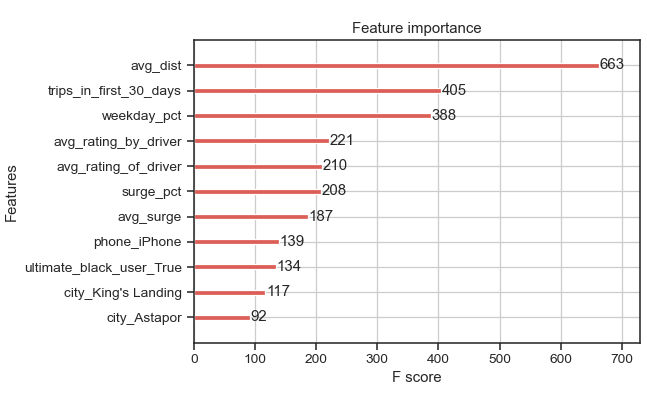

In [26]:
# Train a model with the best parameters
xgb_best = XGBClassifier(objective='binary:logistic', random_state=1, eta=0.1, gamma=0, max_depth=5, 
                             min_child_weight=2, subsample=0.8)

xgb_best.fit(X_train, y_train)

# Plot the feature importance
ax6 = plot_importance(xgb_best)
fig6 = ax6.figure
fig6.set_size_inches(8, 5)
plt.subplots_adjust(left=0.3, right=0.99, bottom=0.15, top=0.9) 

### 3.3. Suggestions

According to the feature importance plot, three features (**"avg_dist", "trips_in_first_30_days", and "weekday_pct"**) were the most important. We saw that "avg_dist" had a negative correlation and "trips_in_first_30_days" had a positive correlation with the retention status. Check the distributions again. 

<IPython.core.display.Javascript object>


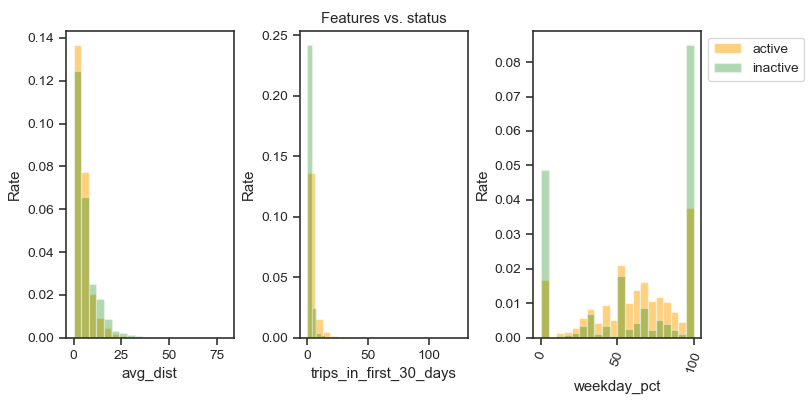

In [28]:
# Important columns
important_columns = ['avg_dist', 'trips_in_first_30_days', 'weekday_pct']

# Plot histograms
plt.figure(figsize=(10,5))

for n in range(3):
    plt.subplot(1,3,n+1)
    plt.hist(df_active[important_columns[n]], histtype='bar', bins=20, alpha=0.5, color='orange', 
             label='active', density=True) 
    plt.hist(df_inactive[important_columns[n]], histtype='bar', bins=20, alpha=0.3, color='green', 
             label='inactive', density=True)
    plt.xlabel('%s'%important_columns[n])
    plt.ylabel('Rate')
    
    if n == 1:
        plt.title('Features vs. status')

plt.xticks(rotation=70) 
plt.legend(['active', 'inactive'], loc='upper left', bbox_to_anchor=(1, 1))
plt.subplots_adjust(left=0.1, right=0.99, bottom=0.1, top=0.9) 
plt.tight_layout()
plt.show()

According to the plots, active users tend to:  
- ride a **shorter distance**,  
- take **more trips in the first 30 days**, and  
- ride on both of **weekdays and weekends**

From all of this research, I suggest these improve the long-term rider retention:  
- **short distance campaign**:  
Short distance rides are cheaper, and it could be not beneficial to discount the fees. I suggest a **"point card" campaign**. For example, a user would get a $5 coupon if a user took "short-distance" rides 5 times in two weeks. (We need more research to decide the number of rides and the definition of "short distance".)  
- **new user campaign**:  
The purpose of this campaign is to let new users take more trips in their first 30 days. It might be worth to have a deficit from this campaign because this is temporary (30 days) and only for new users. For example, a new user can have a **20% discount maximum of 10 times in the first 30 days**.  
- **constant ride campaign**:  
This campaign is for letting users take a ride constantly on weekdays and weekends. For example, if a user rode only on weekends, the user might **get a coupon that could be used on weekdays**, and vice versa.  
